# Imports

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

In [2]:
def adj_r2(lr, X, y):
    return 1 - ((1 - lr.score(X, y)) * (len(X) - 1)) / (len(X) - len(X.columns) - 1)

#https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/    

In [3]:
results = pd.DataFrame(columns= ['Features', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2',
                      'Train Adjusted R2', 'Test Adjusted R2'])

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [4]:
ahd_train = pd.read_csv("./datasets/train.csv")
ahd_test = pd.read_csv("./datasets/test.csv")
print(ahd_train.shape)
print(ahd_test.shape)

(2051, 81)
(878, 80)


In [5]:
ahd_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Clean

In [6]:
ahd_train.set_index("Id", inplace= True)
ahd_test.set_index("Id", inplace= True)

In [7]:
pd.DataFrame(ahd_train.isnull().sum().sort_values(ascending = False)).head(26)

,0
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Qual,114
Garage Yr Blt,114
Garage Cond,114


In [8]:
#Missing pools should have 'NA' value
ahd_train['Pool QC'] = ahd_train['Pool QC'].fillna('NA')
ahd_test['Pool QC'] = ahd_test['Pool QC'].fillna('NA')

In [9]:
#Missing Misc Feature should also be 'NA'
ahd_train['Misc Feature'] = ahd_train['Misc Feature'].fillna('NA')
ahd_test['Misc Feature'] = ahd_test['Misc Feature'].fillna('NA')

In [10]:
##No Alley access should be 'NA'
ahd_train['Alley'] = ahd_train['Alley'].fillna('NA')
ahd_test['Alley'] = ahd_test['Alley'].fillna('NA')

In [11]:
##No Fireplace should have no fireplace quality as 'NA'
ahd_train['Fireplace Qu'] = ahd_train['Fireplace Qu'].fillna('NA')
ahd_test['Fireplace Qu'] = ahd_test['Fireplace Qu'].fillna('NA')

In [12]:
##Homes without lot frontage should have a value of 0
ahd_train['Lot Frontage'] = ahd_train['Lot Frontage'].fillna(0)
ahd_test['Lot Frontage'] = ahd_test['Lot Frontage'].fillna(0)

In [13]:
##Homes without garages need 'NA' in ordinal columns
ahd_train['Garage Type'] = ahd_train['Garage Type'].fillna('NA')
ahd_test['Garage Type'] = ahd_test['Garage Type'].fillna('NA')

ahd_train['Garage Finish'] = ahd_train['Garage Finish'].fillna('NA')
ahd_test['Garage Finish'] = ahd_test['Garage Finish'].fillna('NA')

ahd_train['Garage Qual'] = ahd_train['Garage Qual'].fillna('NA')
ahd_test['Garage Qual'] = ahd_test['Garage Qual'].fillna('NA')

ahd_train['Garage Cond'] = ahd_train['Garage Cond'].fillna('NA')
ahd_test['Garage Cond'] = ahd_test['Garage Cond'].fillna('NA')

##Homes with no garages should have a garage car count of 0
ahd_train['Garage Cars'] = ahd_train['Garage Cars'].fillna(0)
ahd_test['Garage Cars'] = ahd_test['Garage Cars'].fillna(0)

##Not going to use garge year built so don't need to clean NaN, but... replace the year with year built anyway
ahd_train['Garage Yr Blt'] = ahd_train['Garage Yr Blt'].fillna(ahd_train['Year Built'])
ahd_test['Garage Yr Blt'] = ahd_test['Garage Yr Blt'].fillna(ahd_test['Year Built'])

In [14]:
## Fence should be 'NA' if no fence 
ahd_train['Fence'] = ahd_train['Fence'].fillna('NA')
ahd_test['Fence'] = ahd_test['Fence'].fillna('NA')

In [15]:
# Clean basement data
ahd_train['Bsmt Qual'] = ahd_train['Bsmt Qual'].fillna('NA')
ahd_test['Bsmt Qual'] = ahd_test['Bsmt Qual'].fillna('NA')

ahd_train['Bsmt Exposure'] = ahd_train['Bsmt Exposure'].fillna('NA')
ahd_test['Bsmt Exposure'] = ahd_test['Bsmt Exposure'].fillna('NA')

ahd_train['BsmtFin Type 2'] = ahd_train['BsmtFin Type 2'].fillna('NA')
ahd_test['BsmtFin Type 2'] = ahd_test['BsmtFin Type 2'].fillna('NA')

ahd_train['BsmtFin Type 1'] = ahd_train['BsmtFin Type 1'].fillna('NA')
ahd_test['BsmtFin Type 1'] = ahd_test['BsmtFin Type 1'].fillna('NA')

ahd_train['Bsmt Cond'] = ahd_train['Bsmt Cond'].fillna('NA')
ahd_test['Bsmt Cond'] = ahd_test['Bsmt Cond'].fillna('NA')

In [16]:
## Fill N/A MV types as none, and N/A MV Area as 0
ahd_train['Mas Vnr Type'] = ahd_train['Mas Vnr Type'].fillna('None')
ahd_test['Mas Vnr Type'] = ahd_test['Mas Vnr Type'].fillna('None')

ahd_train['Mas Vnr Area'] = ahd_train['Mas Vnr Area'].fillna(0)
ahd_test['Mas Vnr Area'] = ahd_test['Mas Vnr Area'].fillna(0)

In [17]:
##Drop the rest of the N/A values
ahd_train.dropna(inplace= True)

In [18]:
ahd_train.isnull().sum().sort_values(ascending = False)

PID             0
MS SubClass     0
Garage Type     0
Fireplace Qu    0
Fireplaces      0
               ..
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
SalePrice       0
Length: 80, dtype: int64

In [19]:
ahd_train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [20]:
ahd_train['Foundation'].value_counts()

PConc     925
CBlock    863
BrkTil    220
Slab       33
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [21]:
#Drop rare foundation rows
ahd_train.drop(ahd_train[ahd_train['Foundation'] == 'Wood'].index, inplace= True)
ahd_train.drop(ahd_train[ahd_train['Foundation'] == 'Stone'].index, inplace= True)

# https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

## Get Dummies

In [198]:
categorical_columns = ahd_train.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Condition 1',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Cond',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [23]:
ahd_train = pd.get_dummies(data = ahd_train, columns= ['Foundation'], drop_first= True)
ahd_test = pd.get_dummies(data = ahd_test, columns= ['Foundation'], drop_first= True)

In [24]:
#ahd_train = pd.get_dummies(data = ahd_train, columns= ['MS Zoning'], drop_first= True)
#ahd_test = pd.get_dummies(data = ahd_test, columns= ['MS Zoning'], drop_first= True)

#Not going to include based on r2 adjusted analysis in performance evaluation

In [25]:
#ahd_train = pd.get_dummies(data = ahd_train, columns= ['Bldg Type'], drop_first= True)
#ahd_test = pd.get_dummies(data = ahd_test, columns= ['Bldg Type'], drop_first= True)

#Not going to include based on r2 adjusted analysis in performance evaluation

In [120]:
ahd_train = pd.get_dummies(data = ahd_train, columns= ['Neighborhood'], drop_first= True)
ahd_test = pd.get_dummies(data = ahd_test, columns= ['Neighborhood'], drop_first= True)

In [135]:
##ahd_train = pd.get_dummies(data = ahd_train, columns= ['Roof Style'], drop_first= True)
##ahd_test = pd.get_dummies(data = ahd_test, columns= ['Roof Style'], drop_first= True)

#Not going to include based on r2 adjusted analysis in performance evaluation

In [147]:
#ahd_train = pd.get_dummies(data = ahd_train, columns= ['Exter Qual'], drop_first= True)
#ahd_test = pd.get_dummies(data = ahd_test, columns= ['Exter Qual'], drop_first= True)

#Not going to include based on r2 adjusted analysis in performance evaluation

In [170]:
ahd_train = pd.get_dummies(data = ahd_train, columns= ['Bsmt Qual'], drop_first= True)
ahd_test = pd.get_dummies(data = ahd_test, columns= ['Bsmt Qual'], drop_first= True)

In [183]:
#ahd_train = pd.get_dummies(data = ahd_train, columns= ['Garage Qual'], drop_first= True)
#ahd_test = pd.get_dummies(data = ahd_test, columns= ['Garage Qual'], drop_first= True)

#Not going to include based on r2 adjusted analysis in performance evaluation for now, will include in a test run

In [200]:
ahd_train = pd.get_dummies(data = ahd_train, columns= ['Sale Type'], drop_first= True)
ahd_test = pd.get_dummies(data = ahd_test, columns= ['Sale Type'], drop_first= True)

## Visualize Distributions

In [27]:
features = ahd_train.select_dtypes(include=np.number).columns.tolist()

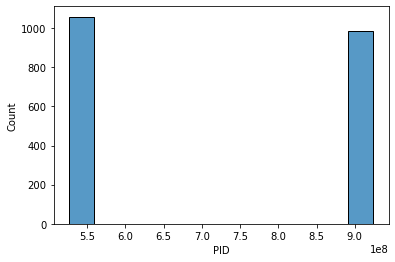

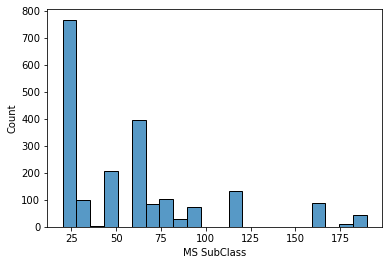

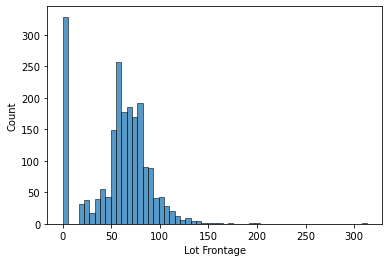

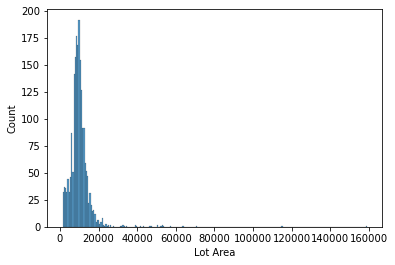

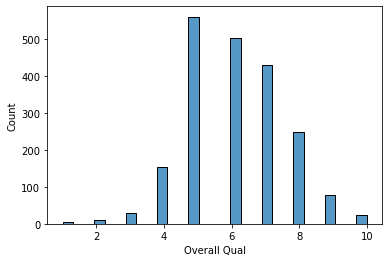

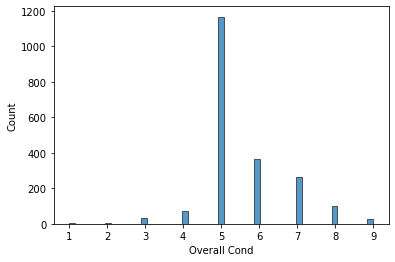

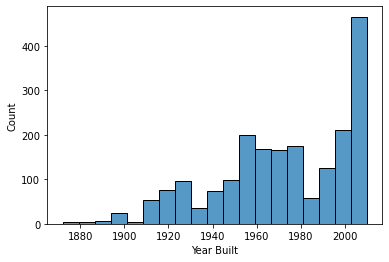

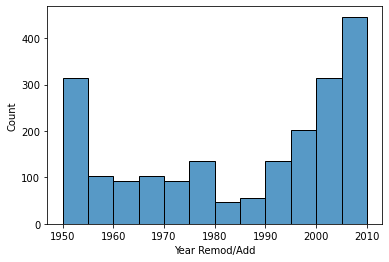

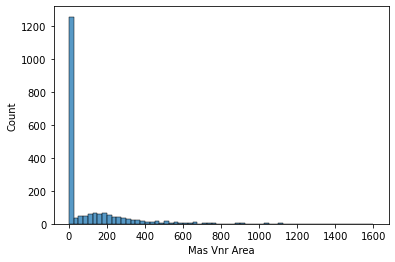

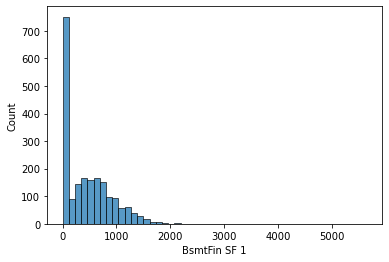

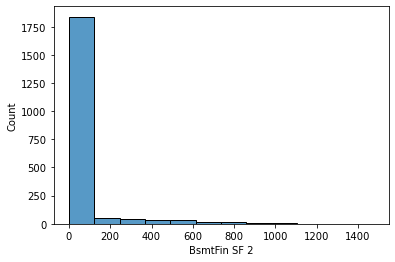

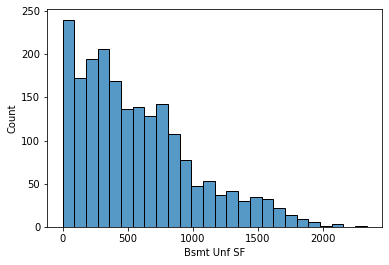

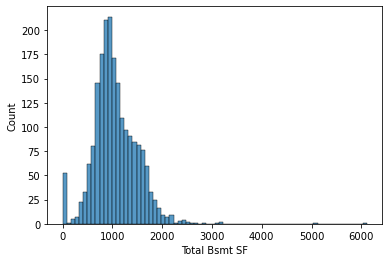

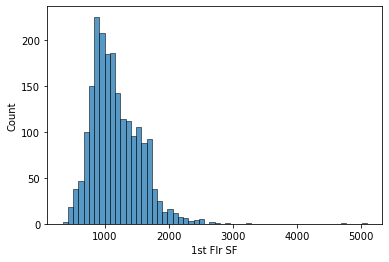

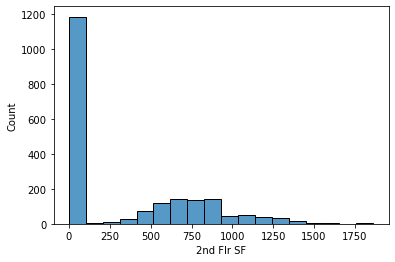

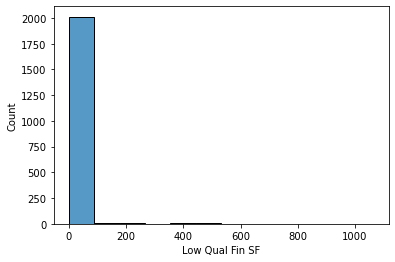

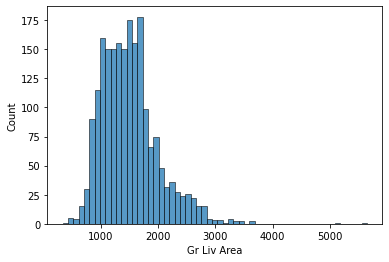

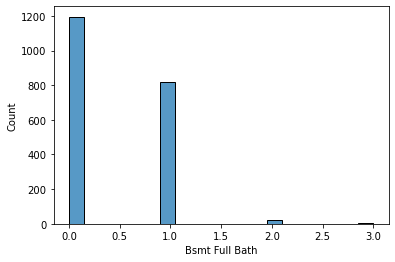

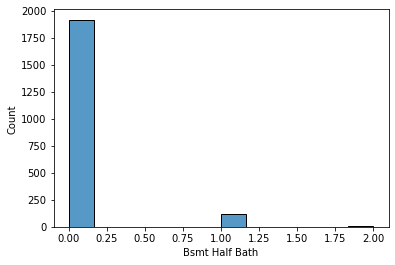

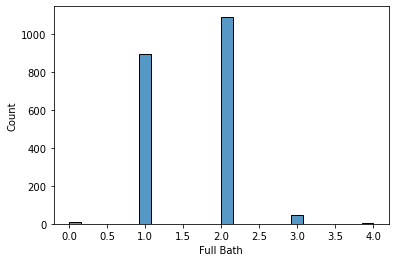

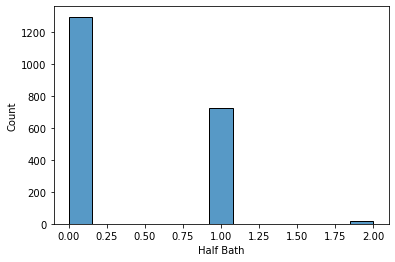

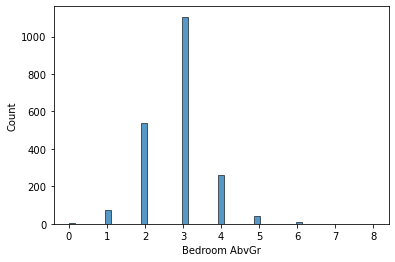

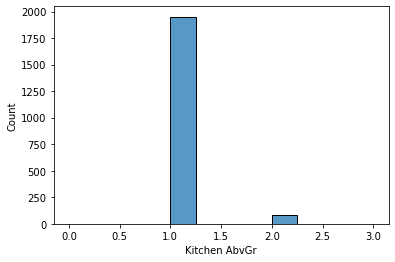

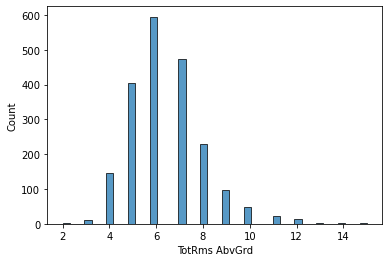

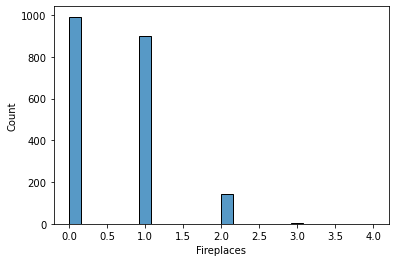

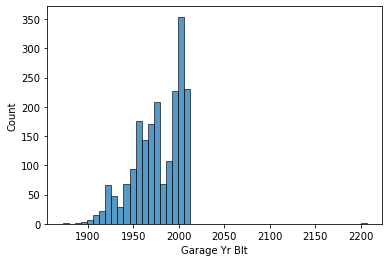

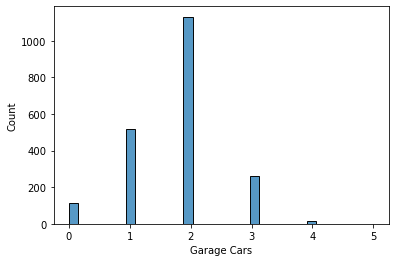

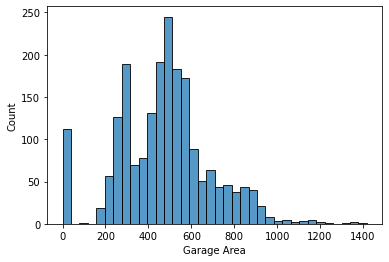

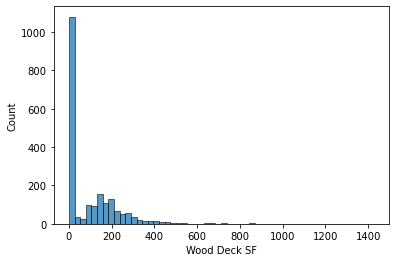

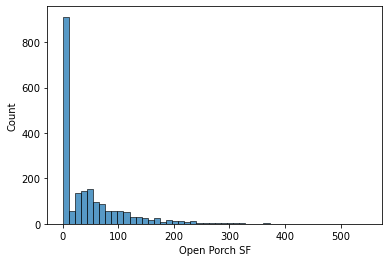

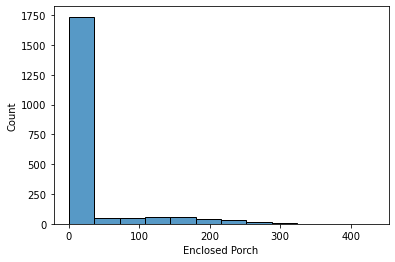

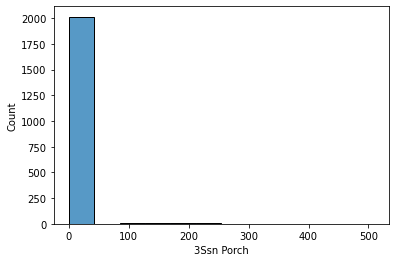

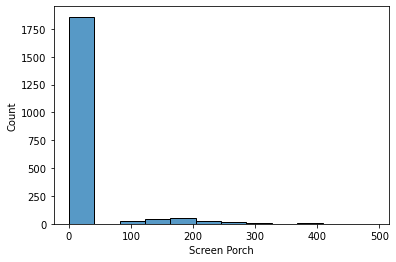

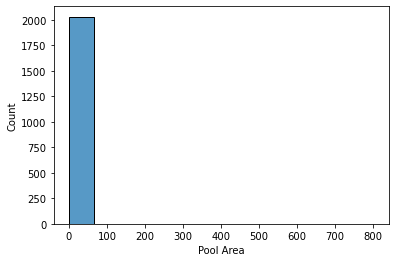

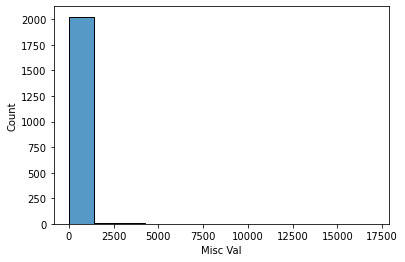

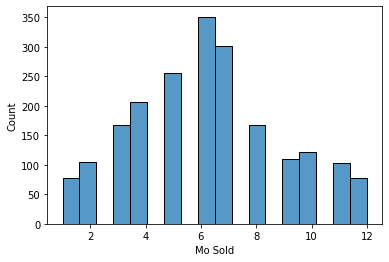

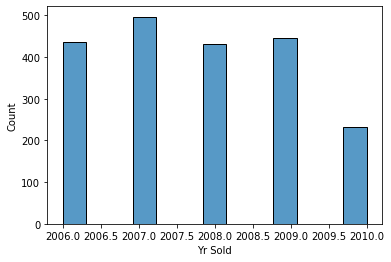

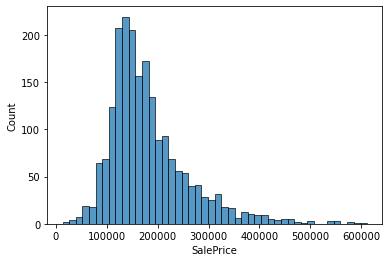

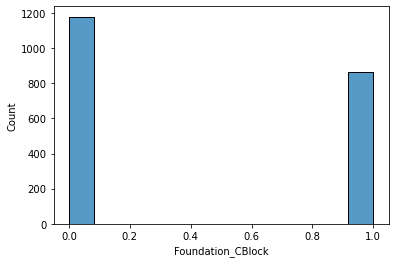

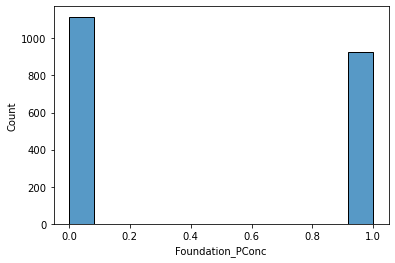

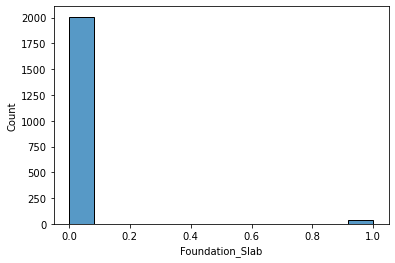

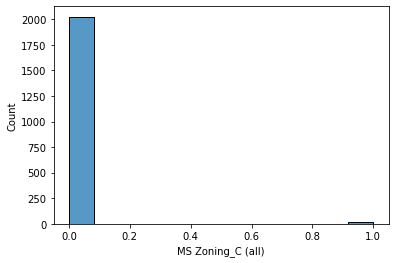

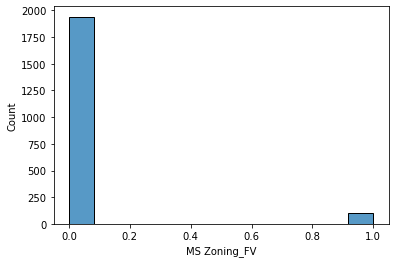

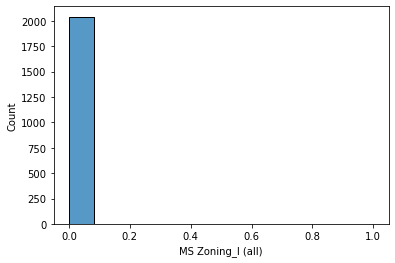

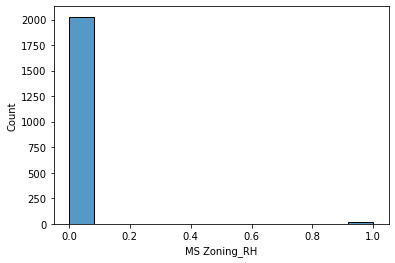

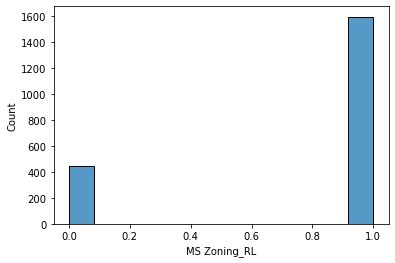

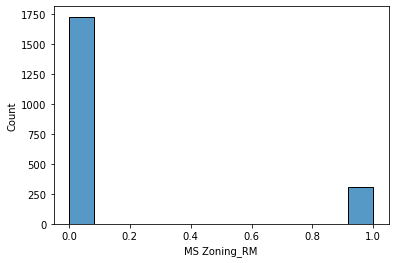

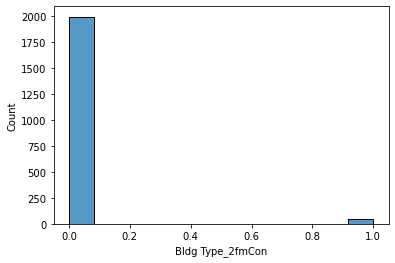

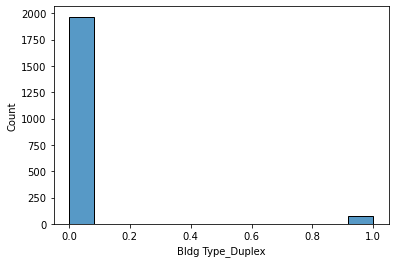

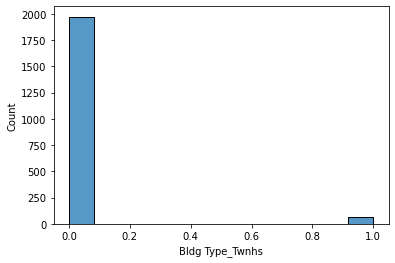

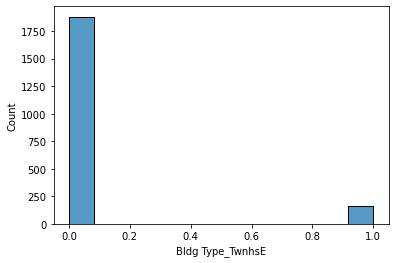

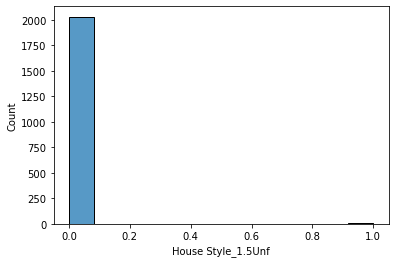

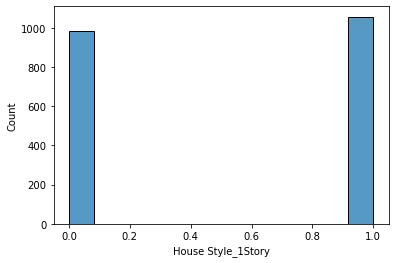

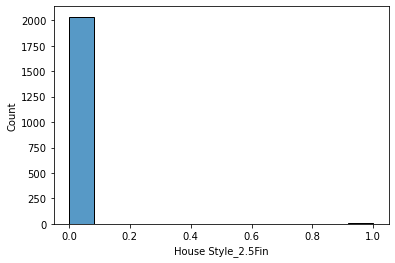

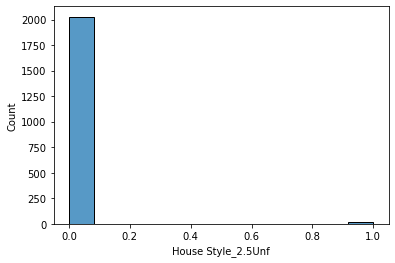

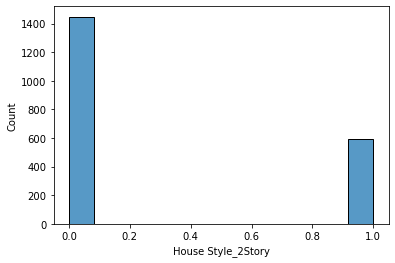

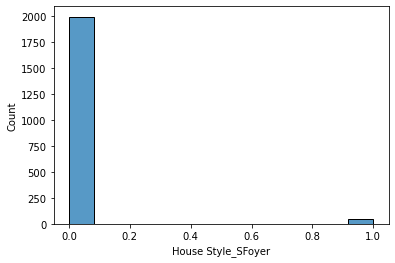

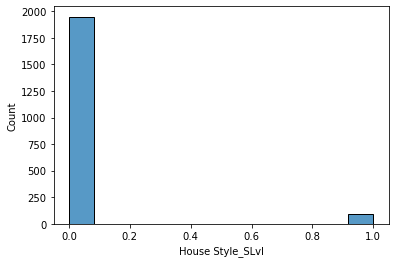

In [28]:
for feature in features:
    sns.histplot(data= ahd_train, x=feature)
    plt.show();

### Key Take-Aways: Distribution Analysis
> Heavily Right Skewed:
>>Lot Area <br>
>>Sale Price

> Heavily Left Skewed:
>>Year Built <br>


> Trending towards Normal Distribution:
>> Month Sold

## Outliers

In [29]:
## Find outliers 3 stds above the mean for lot area and drop them
## There are no outliers 3std below the mean

lot_area_mean = ahd_train['Lot Area'].mean()
lot_area_3std = ahd_train['Lot Area'].std()*3

ahd_train.drop(ahd_train[ahd_train['Lot Area'] > (lot_area_mean + lot_area_3std)].index, inplace= True)

In [30]:
## Find outliers 3 stds above the mean for lot area and drop them
## There are no outliers 3std below the mean

sale_price_mean = ahd_train['SalePrice'].mean()
sale_price_3std = ahd_train['SalePrice'].std()*3

ahd_train.drop(ahd_train[ahd_train['SalePrice'] > (sale_price_mean + sale_price_3std)].index, inplace= True)
ahd_train.drop(ahd_train[ahd_train['SalePrice'] < (sale_price_mean - sale_price_3std)].index, inplace= True)

In [31]:
ahd_train.shape

(1984, 96)

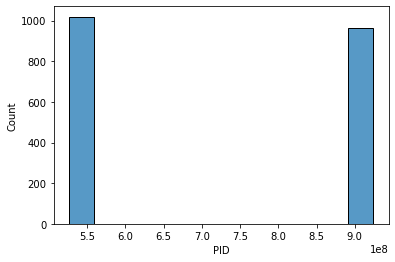

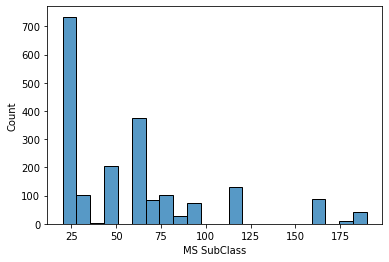

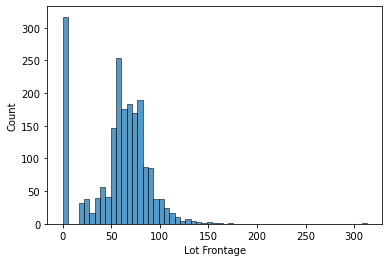

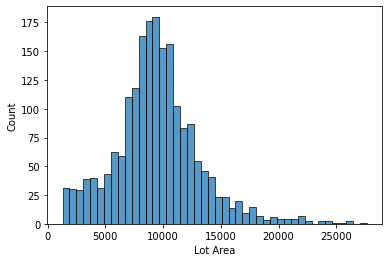

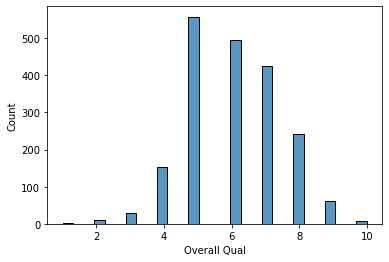

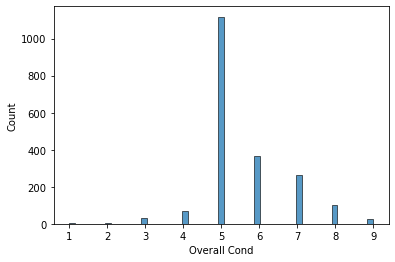

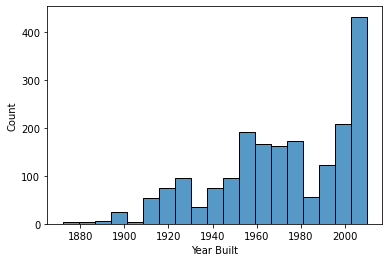

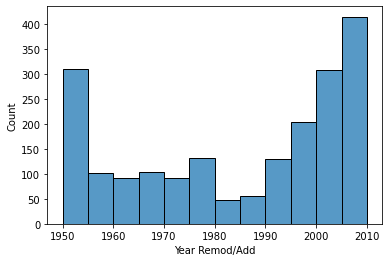

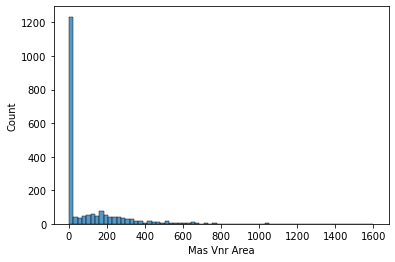

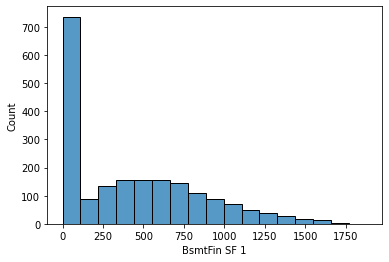

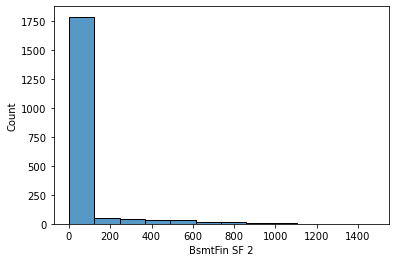

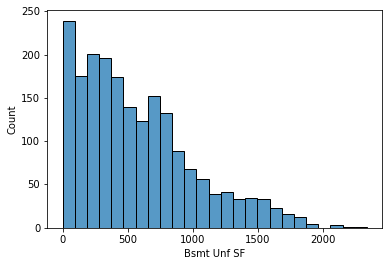

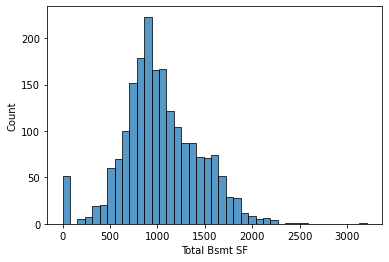

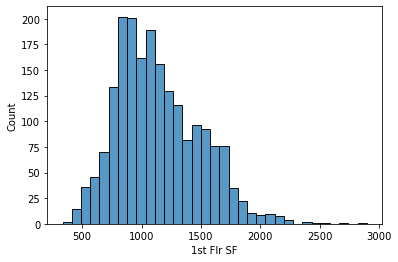

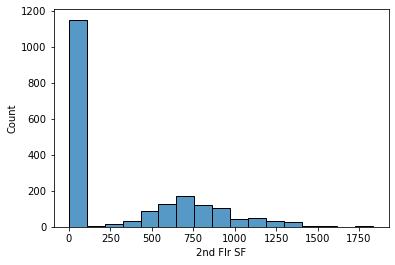

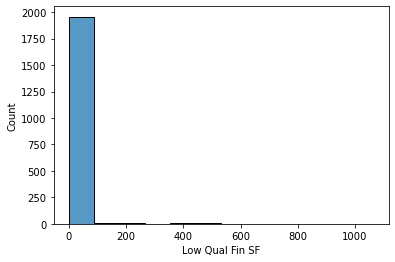

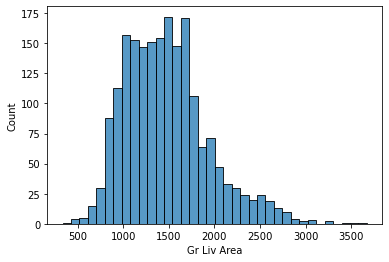

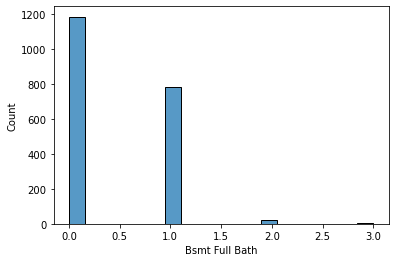

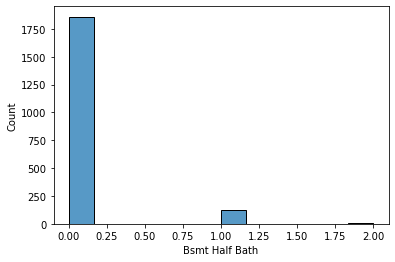

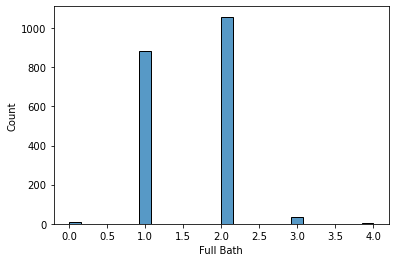

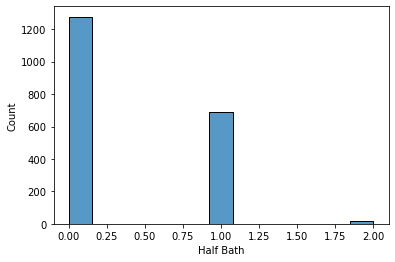

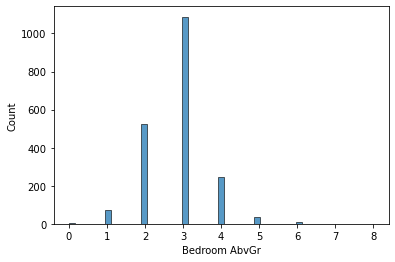

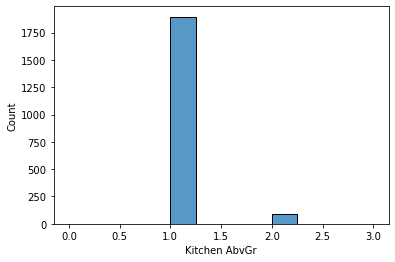

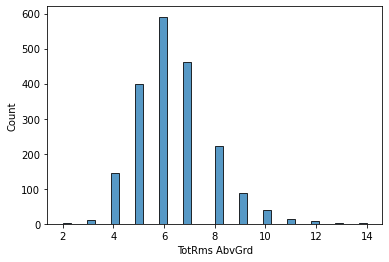

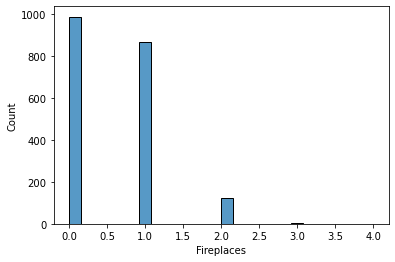

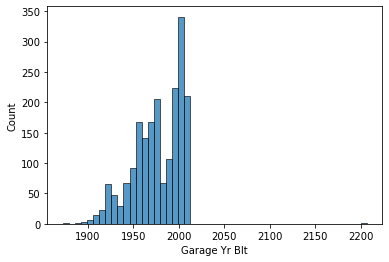

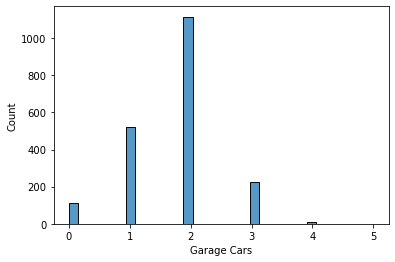

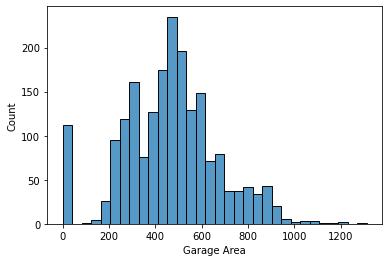

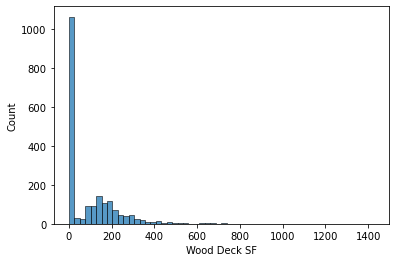

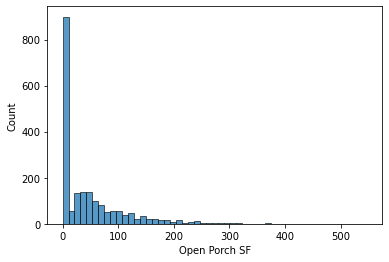

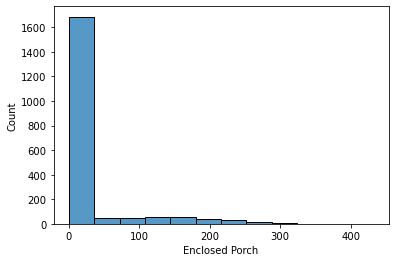

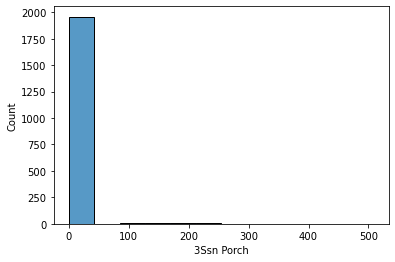

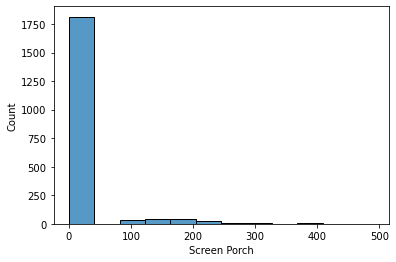

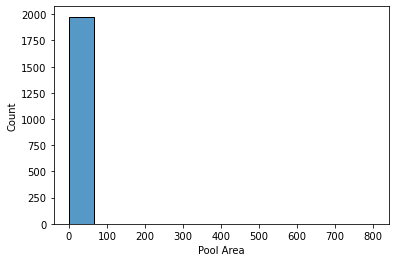

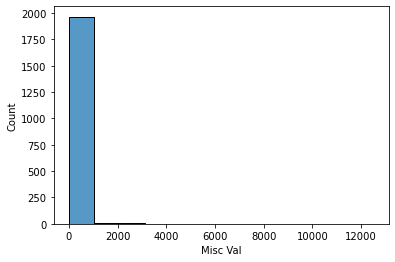

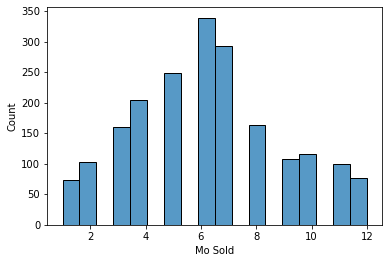

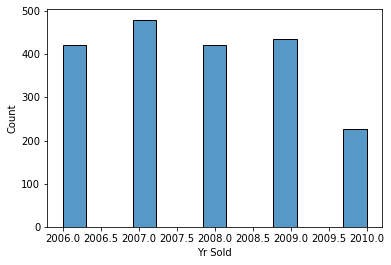

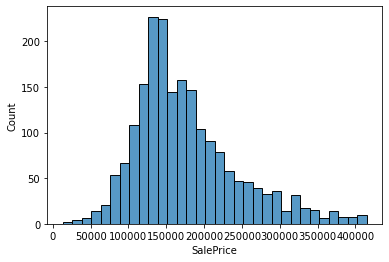

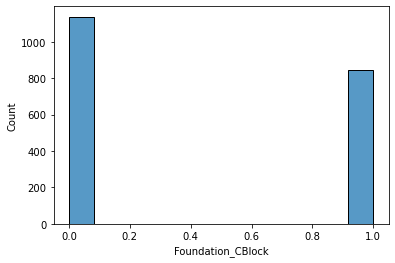

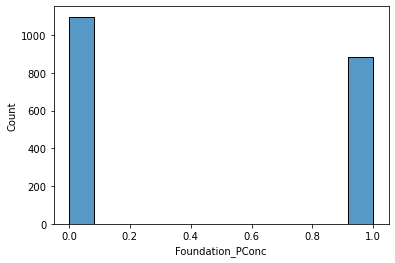

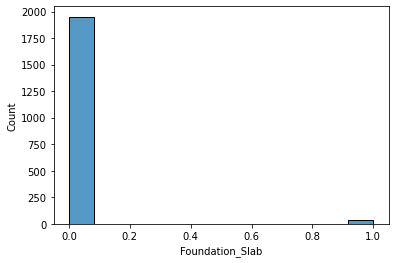

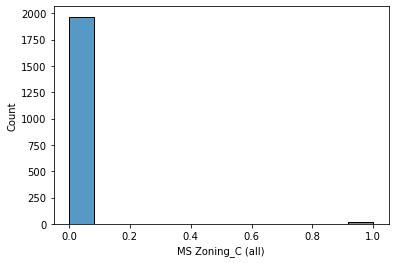

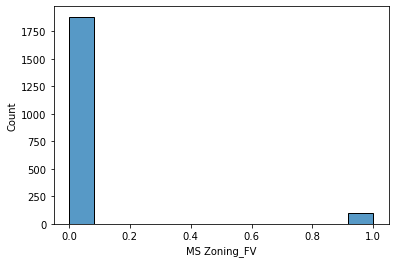

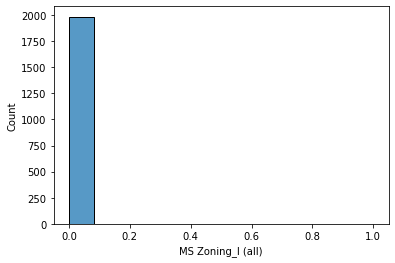

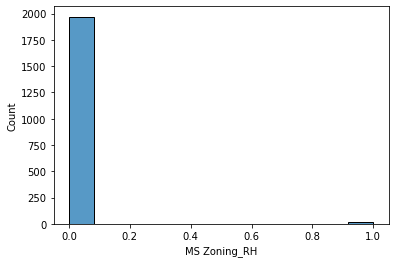

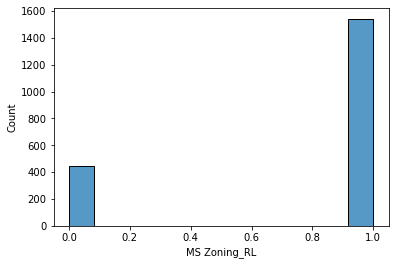

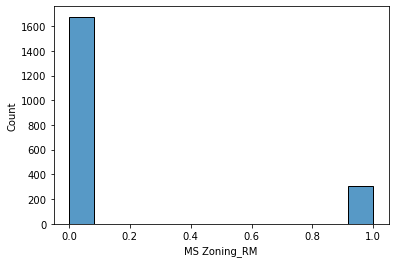

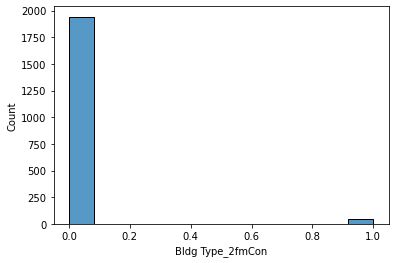

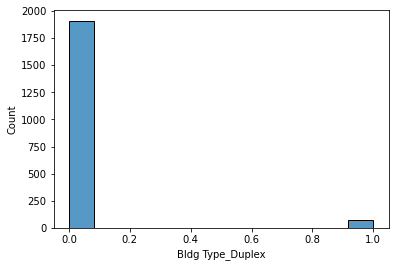

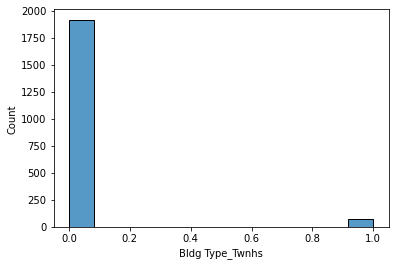

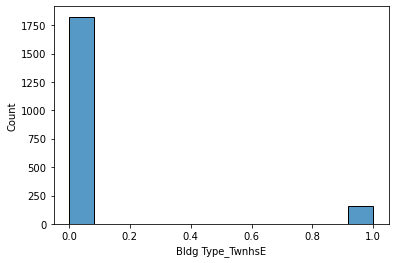

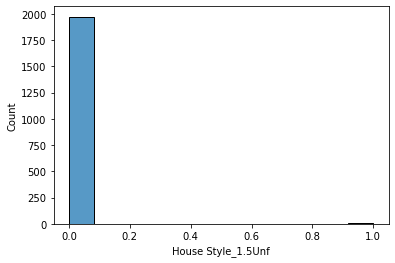

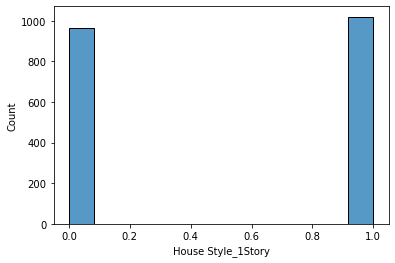

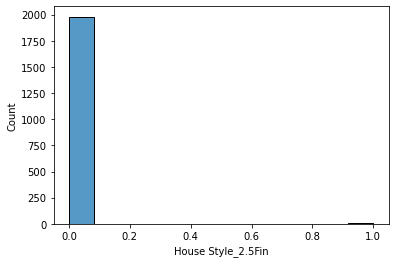

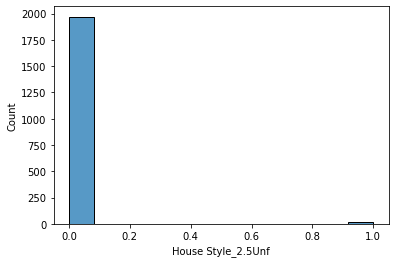

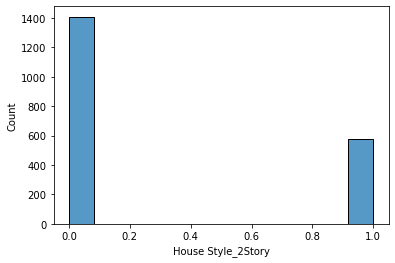

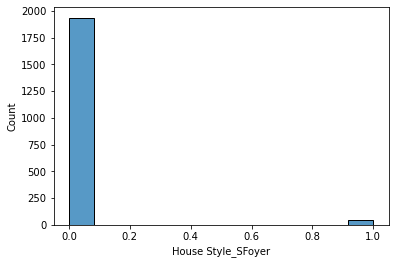

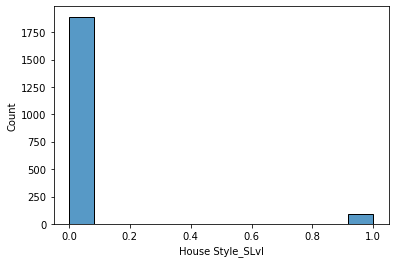

In [32]:
##Revisualize Distibutions to see affect of removing outliersb

features = ahd_train.select_dtypes(include=np.number).columns.tolist()
for feature in features:
    sns.histplot(data= ahd_train, x=feature)
    plt.show();

## EDA

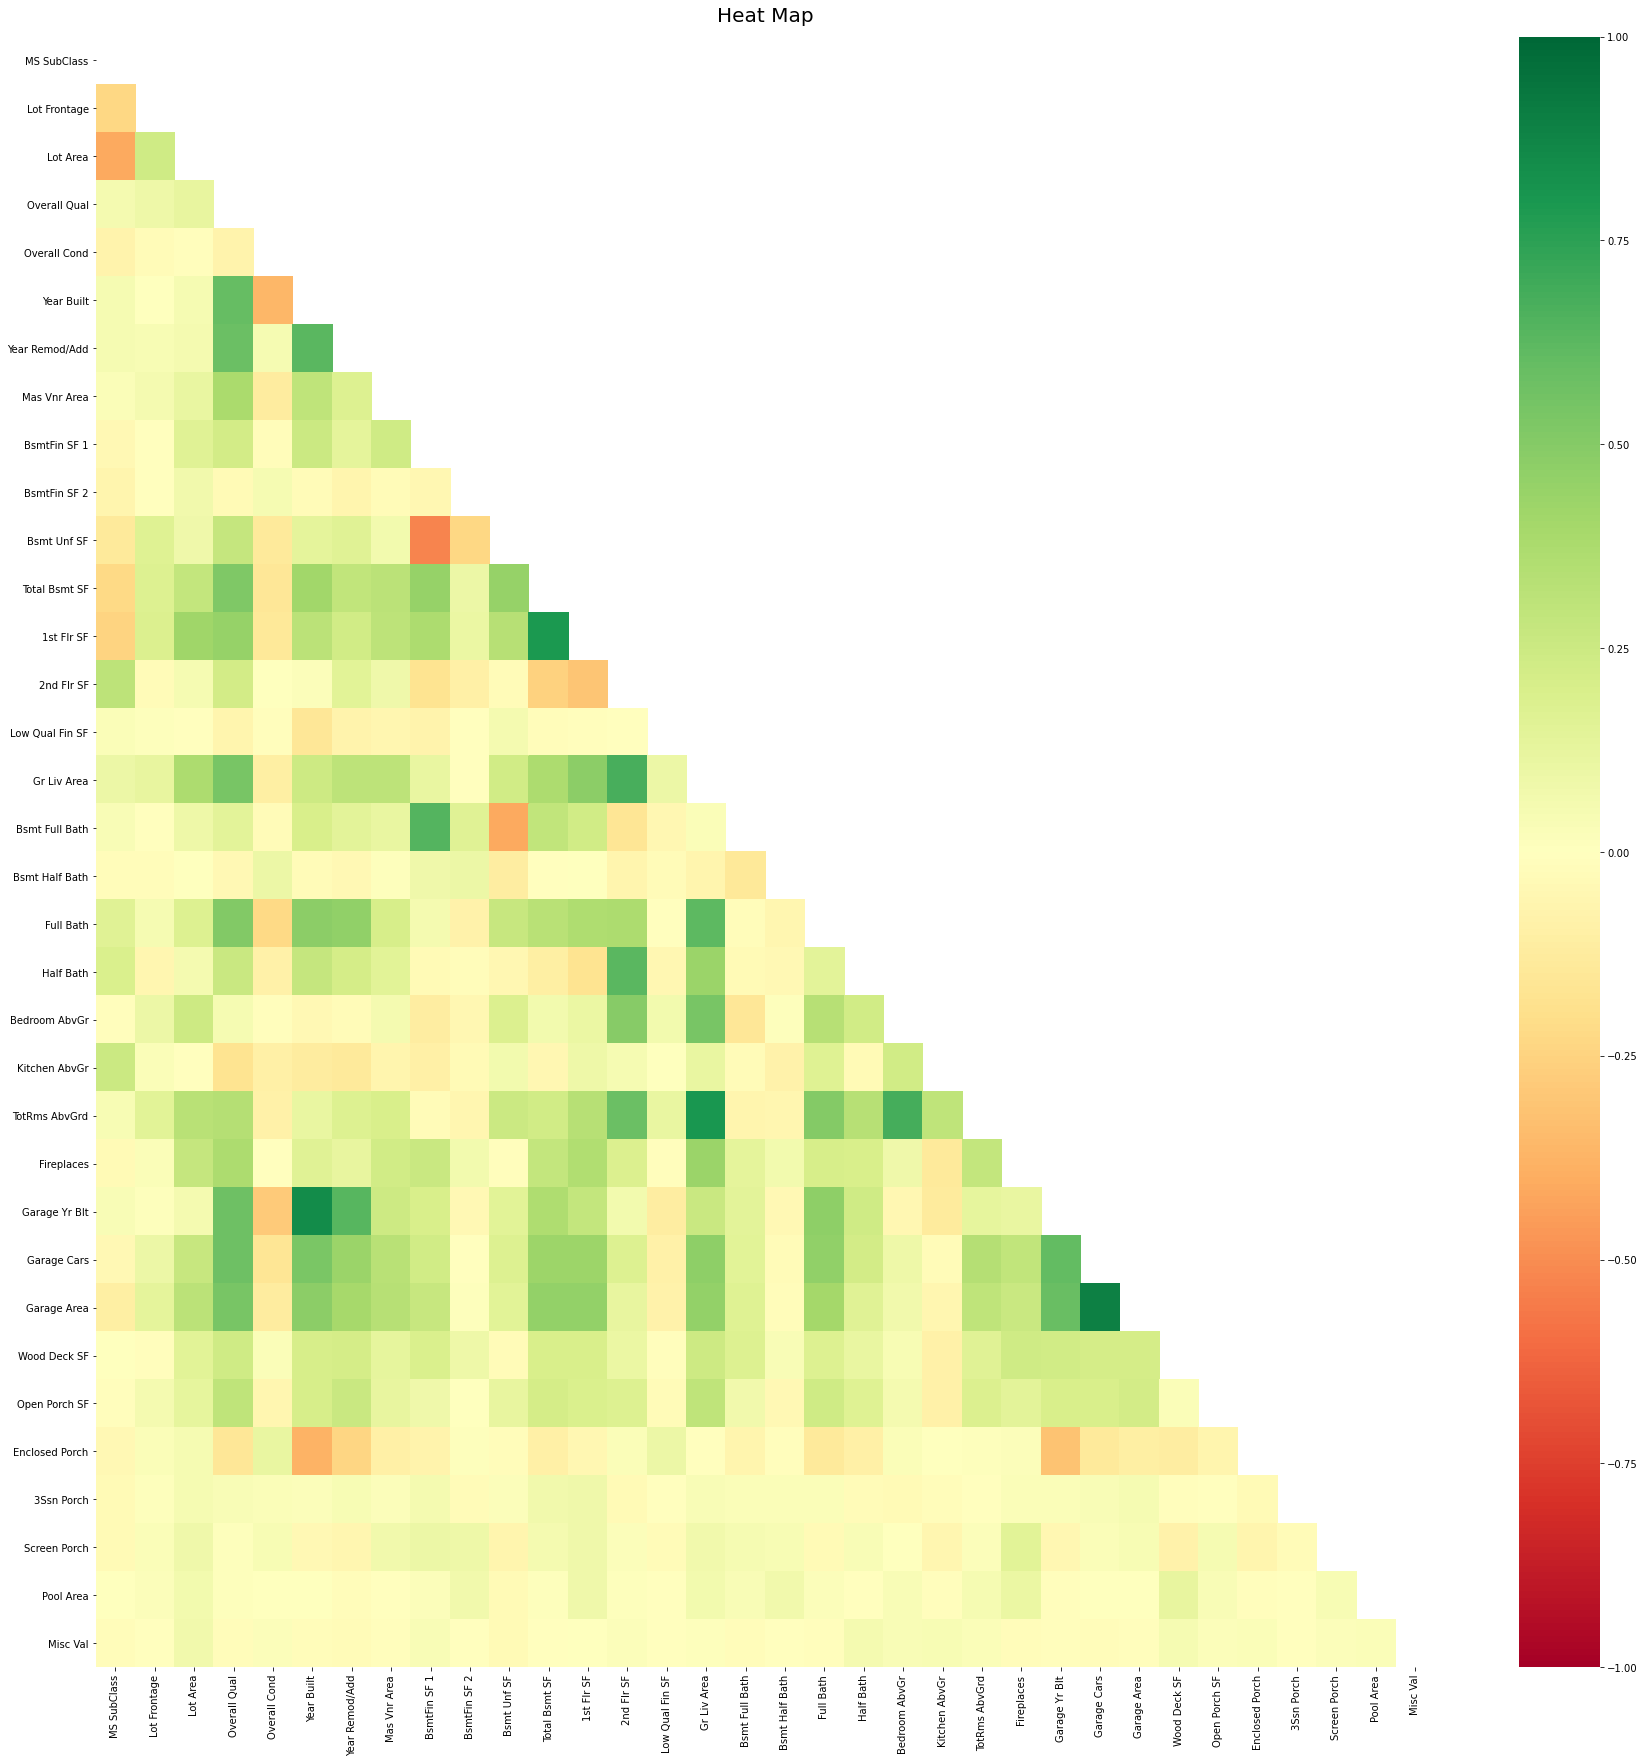

In [54]:
plt.figure(figsize= (30,30))
corr = ahd_train[features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data= corr, mask = mask, cmap= 'RdYlGn', vmin= -1, vmax= 1)
plt.title("Heat Map", pad= 15, fontsize= 20);

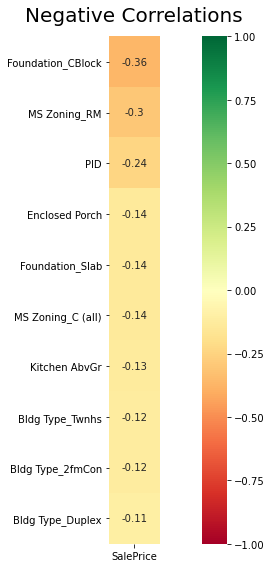

In [34]:
plt.figure(figsize=(12, 8))
corr = ahd_train[features].corr()[['SalePrice']].sort_values(by= 'SalePrice')
sns.heatmap(data= corr.iloc[:10, :], annot= True, cmap= 'RdYlGn', vmin= -1, vmax= 1, square= True)
plt.title("Negative Correlations", pad= 15, fontsize= 20)
plt.tight_layout();

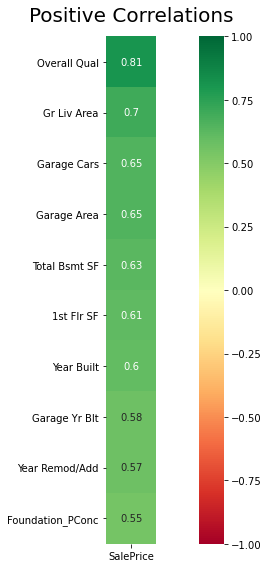

In [35]:
plt.figure(figsize=(12, 8))
corr = ahd_train[features].corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending= False)
sns.heatmap(data= corr.iloc[1:11 , :], annot= True, cmap= 'RdYlGn', vmin= -1, vmax= 1, square= True)
plt.title("Positive Correlations", pad= 15, fontsize= 20)
plt.tight_layout();

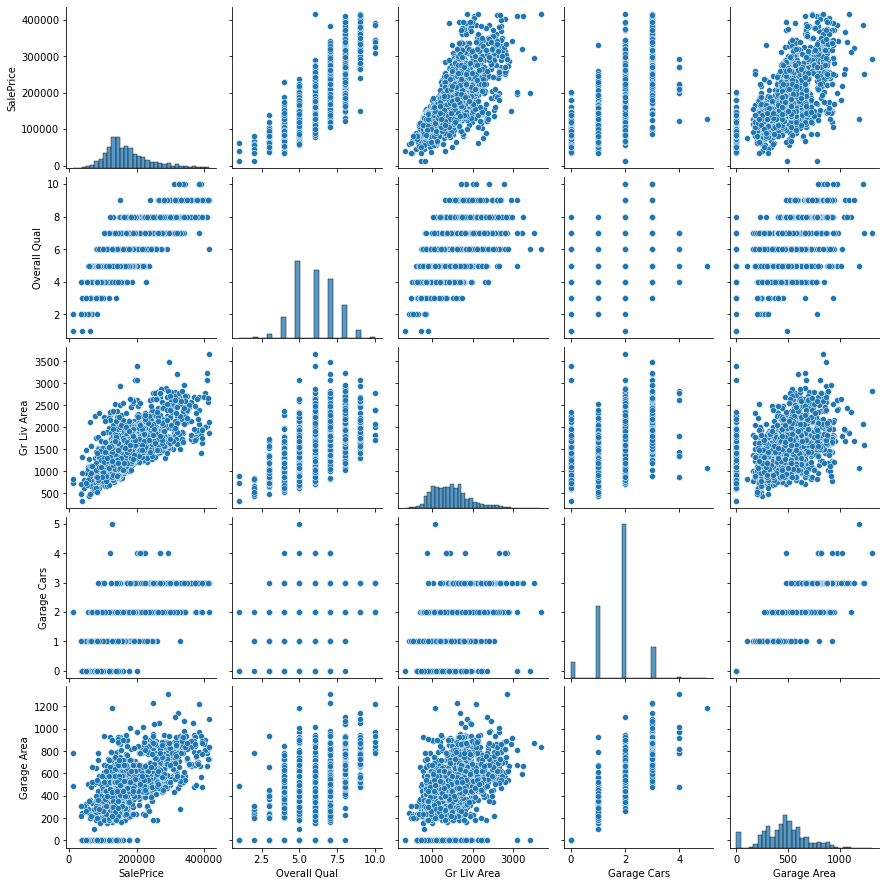

In [36]:
sns.pairplot(data= ahd_train, x_vars= ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area'],
             y_vars= ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area'])

## Summary Statistics

In [37]:
ahd_train.describe().iloc[:, 1:16]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,57.298387,57.311492,9462.603327,6.062500,5.569556,1971.399698,1983.895161,90.083165,421.963206,47.477823,565.684476,1035.125504,1140.198085,326.619960,5.356351
std,42.742998,31.982452,3694.728649,1.364533,1.106621,30.033164,20.998910,157.253664,420.299396,162.345667,440.933813,401.500528,352.498852,420.447171,50.279226
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,20.000000,43.000000,7444.750000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,221.750000,787.000000,874.000000,0.000000,0.000000
50%,50.000000,63.000000,9316.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,360.000000,0.000000,474.000000,988.000000,1080.000000,0.000000,0.000000
75%,70.000000,78.000000,11235.000000,7.000000,6.000000,2000.000000,2003.250000,145.000000,712.250000,0.000000,810.000000,1286.500000,1368.000000,689.000000,0.000000
max,190.000000,313.000000,27650.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1880.000000,1474.000000,2336.000000,3206.000000,2898.000000,1836.000000,1064.000000


In [38]:
ahd_train.describe().iloc[:, 16:31]

,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,1472.174395,0.415323,0.064516,1.567036,0.365423,2.841734,1.043347,6.372984,0.570060,1976.414315,1.751512,464.823085,90.881552,45.906754,22.595262
std,460.770954,0.517848,0.253808,0.541325,0.500160,0.818441,0.210985,1.488228,0.624052,27.041268,0.751699,207.796677,124.685677,64.686683,59.905919
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1121.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.750000,1.000000,312.000000,0.000000,0.000000,0.000000
50%,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,478.000000,0.000000,25.000000,0.000000
75%,1716.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,162.500000,68.000000,0.000000
max,3672.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,2207.000000,5.000000,1314.000000,1424.000000,547.000000,432.000000


In [55]:
ahd_train.describe().iloc[:, 31:46]

,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Foundation_CBlock,Foundation_PConc,Foundation_Slab,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,2.678931,15.835181,1.954133,43.235383,6.227823,2007.781754,175788.776210,0.426411,0.446573,0.016633,0.008569,0.050907,0.000504,0.007056,0.776714
std,25.647721,55.926042,34.684056,437.896656,2.742157,1.311822,68256.445734,0.494680,0.497263,0.127924,0.092192,0.219864,0.022451,0.083727,0.416554
min,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,415298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
ahd_train.describe().iloc[:, 46:]

,MS Zoning_RM,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,0.155746,0.021169,0.037802,0.034778,0.080645,0.006048,0.514113,0.002520,0.007056,0.290323,0.024698,0.047379
std,0.362706,0.143985,0.190766,0.183264,0.272358,0.077555,0.499927,0.050151,0.083727,0.454026,0.155241,0.212502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Measuring Model Performance - Linear Regression

In [67]:
results = pd.DataFrame(columns= ['Features', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2',
                      'Train Adjusted R2', 'Test Adjusted R2'])

## Iteratrion - Start

In [281]:
features = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
            'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
            'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
            'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
            'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
            'Screen Porch', 'Pool Area', 'Misc Val', 'Foundation_CBlock', 'Foundation_PConc',
            'Foundation_Slab', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
            'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
            'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR',
            'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
            'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
            'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
            'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
            'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_NA', 'Bsmt Qual_TA', 'Garage Qual_Gd',
            'Garage Qual_NA', 'Garage Qual_Po', 'Garage Qual_TA']

In [282]:
X = ahd_train[features]
y = ahd_train['SalePrice']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [284]:
y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline = [y_train.mean()]*len(y_test)

In [285]:
print(f'Baseline RMSE - Train: {mean_squared_error(y_train, y_train_baseline)**0.5}')
print(f'Baseline RMSE - Test: {mean_squared_error(y_test, y_test_baseline)**0.5}')

Baseline RMSE - Train: 68211.36540805876
Baseline RMSE - Test: 68324.9809902631


In [286]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [287]:
train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared= False)
test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared= False)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 20463.839981994268
Test RMSE: 20554.348554875804


In [288]:
train_r2 = lr.score(X_train, y_train)
test_r2 = lr.score(X_test, y_test)

print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train R2: 0.9099962144364114
Test R2: 0.9094769529297506


In [289]:
train_adj_r2 = adj_r2(lr, X_train, y_train)
test_adj_r2 = adj_r2(lr, X_test, y_test)

print(f'Train Adjusted R2: {train_adj_r2}')
print(f'Test Adjusted R2: {test_adj_r2}')

Train Adjusted R2: 0.9055500147261424
Test Adjusted R2: 0.8945672745887684


In [290]:
results = results.append(pd.DataFrame(np.array([[str(list(X_train.columns)),
    train_rmse,test_rmse, train_r2, test_r2, train_adj_r2, test_adj_r2]]),
    columns= ['Features', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2', 'Train Adjusted R2', 'Test Adjusted R2'])) 
results

,Features,Train RMSE,Test RMSE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",24025.79098805115,23394.337290072795,0.8759371072850775,0.8827336994239388,0.8730340526723401,0.8740849917892618
1,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",23625.573845691226,22977.933770785217,0.8800359149990173,0.886871070628789,0.8769747624851991,0.8777318339765297
2,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",23563.446689897417,22925.972529332863,0.8806660142291376,0.887382141223057,0.8771124398606147,0.8766684953659585
3,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",23559.942576449,23073.675647659253,0.8807015038362126,0.8859263606997189,0.8773189047057041,0.8756245562695173
4,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",23542.09402438745,22920.277939768785,0.8808821917859094,0.8874380806458749,0.8772500479457015,0.8764564299771798
5,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",21411.876115339364,21058.75555450325,0.9014637664200877,0.904979538095801,0.8970320594987143,0.8908697711309084
6,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",21183.6110266408,21489.50002682123,0.903553493632295,0.9010526077081972,0.8988603984705379,0.8850259174074122
7,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",20144.753435101822,20875.12827428313,0.9127811359168314,0.9066294244091533,0.9086658796537523,0.8920130025292777
8,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",21578.324213554795,21215.873891476997,0.8999258426117204,0.9035563627438459,0.8956449705214784,0.8900009206410224
9,"['MS SubClass', 'Lot Frontage', 'Lot Area', 'O...",20356.488374886096,20432.464993716203,0.9109380423509605,0.9105473404115046,0.9066700979393082,0.8963019519992852


## Iteratrion - Stop

### Observations

''

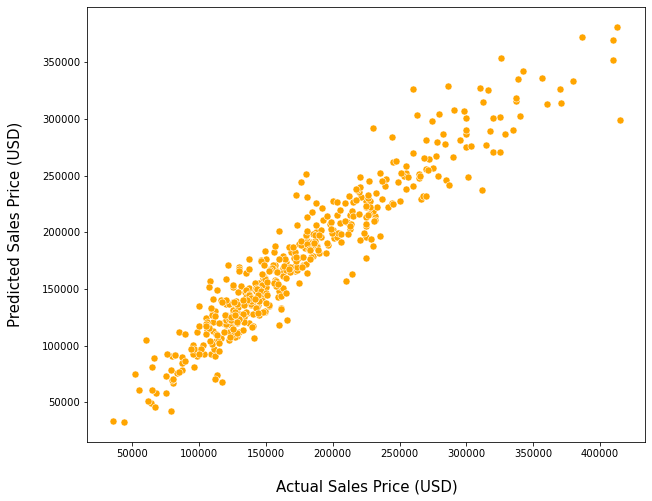

In [381]:
plt.figure(figsize= (10, 8))
sns.scatterplot(x= y_test, y= lr.predict(X_test), s= 50, color= 'orange')
plt.xlabel("Actual Sales Price (USD)", labelpad= 20, fontsize = 15)
plt.ylabel("Predicted Sales Price (USD)", labelpad= 20, fontsize = 15)

;

In [219]:
results.reset_index(drop = True, inplace= True)
results.to_csv('./datasets/model_evaluation.csv')

> Better R2 Adjsuted in test and train with dummy foundation columns, added them <br>
> Better R2 Adjusted with neighborhood dummy columns, added them <br>
> Better R2 Adjusted with basement quality dummy columns, add them <br>
> Could be a toss up for garage quality --> better RMSE but lower R2 adjusted for test (submit both and see?)
> 

# Production Algorithms

## Ridge

In [301]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [302]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [303]:
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.9099951738872839
0.9095012567807503


In [362]:
# Instantiate.
ridge_cv = RidgeCV()

# Fit.
ridge_cv.fit(Z_train, y_train)

param_dict = {
    'cv'  : [3,5,7]
}

grid_search_cv = GridSearchCV(RidgeCV(), param_dict)
grid_search_cv.fit(Z_train, y_train)

print(grid_search_cv.best_params_)

# Evaluate model using R2.
print(f"Ridge Training Score: {ridge.score(Z_train, y_train)}")
print(f"Ridge Testing Score: {ridge.score(Z_test, y_test)}")

pred_ridge = ridge.predict(Z_test)
mean_squared_error(y_test, pred_ridge, squared= False)

##from lesson 4.07 and breakout session with Noah on grid searching

{'cv': 5}
Ridge Training Score: 0.9098057370708077
Ridge Testing Score: 0.9106487122733505


20420.884207983592

## Lasso CV

In [361]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas, cv = 7,
                   max_iter = 5000, tol = 0.0017575106248547913)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

param_dict = {
    'cv'  : [3,5,7],
    'tol' : np.logspace(-3, 0, 50)
}

grid_search_cv = GridSearchCV(LassoCV(), param_dict)
grid_search_cv.fit(Z_train, y_train)

print(grid_search_cv.best_params_)

##from lesson 4.07 and breakout session with Noah on grid searching

{'cv': 7, 'tol': 0.0017575106248547913}


In [356]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.9099958280194375
0.9095439092577288


In [384]:
pd.DataFrame({
    'column': X.columns,
    'coef': lr.coef_
}).sort_values(by= 'coef', ascending= False).head(20)

,column,coef
3,Overall Qual,10846.561566
67,Garage Qual_NA,10157.188565
4,Overall Cond,5764.269280
59,Neighborhood_StoneBr,5452.811010
35,Foundation_PConc,4554.651246
23,Fireplaces,4243.691523
52,Neighborhood_NoRidge,3763.635303
16,Bsmt Full Bath,3053.449907
22,TotRms AbvGrd,1840.802873
53,Neighborhood_NridgHt,1386.644425


In [292]:
X_kaggle = ahd_test.loc[:, features]

In [293]:
X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Neighborhood_Veenker,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_NA,Bsmt Qual_TA,Garage Qual_Gd,Garage Qual_NA,Garage Qual_Po,Garage Qual_TA,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,69.0,9142,6,8,1910,1950,0.0,0,0,...,0,1,0,0,0,0,0,1,0,125866.773964
2718,90,0.0,9662,5,4,1977,1977,0.0,0,0,...,0,0,1,0,0,0,0,0,1,145480.381559
2414,60,58.0,17104,7,5,2006,2006,0.0,554,0,...,0,0,1,0,0,0,0,0,1,206850.566872
1989,30,60.0,8520,5,6,1923,2006,0.0,0,0,...,0,0,0,0,1,0,0,0,0,109052.261232
625,20,0.0,9500,6,5,1963,1963,247.0,609,0,...,0,0,1,0,0,0,0,0,1,170939.071023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,60,80.0,8000,6,6,1974,1974,0.0,931,153,...,0,0,0,0,1,0,0,0,1,190292.237455
1234,60,90.0,14670,6,7,1966,1999,410.0,575,0,...,0,0,0,0,1,0,0,0,1,211082.102064
1373,20,55.0,8250,5,5,1968,1968,0.0,250,492,...,0,0,0,0,1,0,0,0,1,123485.632602


In [294]:
output= X_kaggle[['SalePrice']]
output.head()

,SalePrice
Id,
2658,125866.773964
2718,145480.381559
2414,206850.566872
1989,109052.261232
625,170939.071023


In [295]:
submission_title = input("What do you want to title submission?")

What do you want to title submission?sub_5


In [298]:
output

,SalePrice
Id,
2658,125866.773964
2718,145480.381559
2414,206850.566872
1989,109052.261232
625,170939.071023
...,...
1662,190292.237455
1234,211082.102064
1373,123485.632602


In [296]:
output.to_csv(f'./datasets/{submission_title}.csv')

In [297]:
output_check = pd.read_csv(f'./datasets/{submission_title}.csv')
output_check

,Id,SalePrice
0,2658,125866.773964
1,2718,145480.381559
2,2414,206850.566872
3,1989,109052.261232
4,625,170939.071023
...,...,...
873,1662,190292.237455
874,1234,211082.102064
875,1373,123485.632602
876,1672,119542.939392
